In [1]:
import numpy as np

from prysm import Pupil, PSF, MTF
from prysm.psf import airydisk

from prysm.otf import diffraction_limited_mtf

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


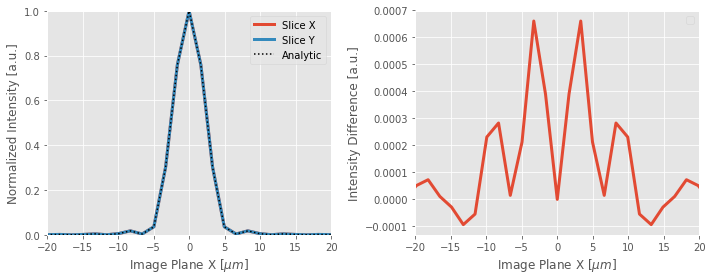

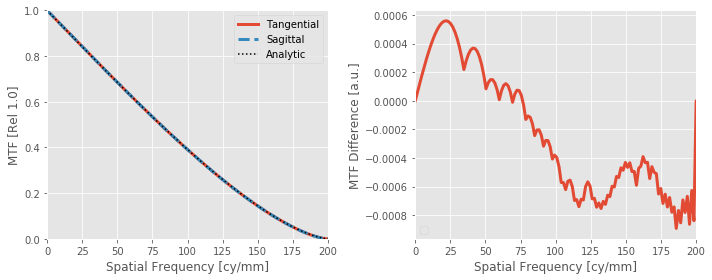

In [2]:
# system parameters
epd = 1
efl = 10
fno = efl / epd
wavelength = 0.5
p = Pupil(wavelength=wavelength, epd=epd)
psf = PSF.from_pupil(p, efl)
u, sx = psf.slice_x
analytical_psf = airydisk(u, fno, wavelength)
psferr = (sx - analytical_psf)

mtf = MTF.from_psf(psf)
nu, m = mtf.tan
m_analytic = diffraction_limited_mtf(fno, wavelength, frequencies=nu)
mtferr = (m - m_analytic)


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
psf.plot_slice_xy(fig=fig, ax=ax1)
ax1.plot(u, analytical_psf, ls=':', c='k', label='Analytic')
ax1.legend()
ax2.plot(u, psferr, lw=3)
ax2.set(xlim=(-20,20), xlabel=r'Image Plane X [$\mu m$]', ylabel='Intensity Difference [a.u.]')
fig.tight_layout()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
mtf.plot_tan_sag(fig=fig, ax=ax1)
ax1.plot(nu, m_analytic, ls=':', c='k', label='Analytic')
ax1.legend()
ax2.plot(nu, mtferr, lw=3)
ax2.set(xlim=(0,200), xlabel='Spatial Frequency [cy/mm]', ylabel='MTF Difference [a.u.]')
fig.tight_layout()